In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constantes:
x0 = 1.0
v0 = 0.0
h = 0.01
c = 0.05
w = 0.7
period = 2*np.pi/w
t0 = 650
tf = 1500

In [3]:
def fv(t, x, v, f):
    return -c * v - np.sin(x) + f * np.cos(w * t)


def fx(t, x, v, f):
    return v

In [4]:

Fl = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

graph = []

for F in Fl:

    m1 = True
    m2 = True

    print(f"Calculating for F = {F}...")

    xl = []
    vl = []
    tl = []

    xpl = []
    vpl = []
    tpl = []

    for n in range(int(tf / (2 * np.pi))):
        tpl.append(round(2 * n * np.pi, 2))

    ti = 0
    xi = x0
    vi = v0

    while ti < tf:

        kx1 = h * fx(ti, xi, vi, F)
        kv1 = h * fv(ti, xi, vi, F)

        kx2 = h * fx(ti + h / 2, xi + kx1 / 2, vi + kv1 / 2, F)
        kv2 = h * fv(ti + h / 2, xi + kx1 / 2, vi + kv1 / 2, F)

        kx3 = h * fx(ti + h / 2, xi + kx2 / 2, vi + kv2 / 2, F)
        kv3 = h * fv(ti + h / 2, xi + kx2 / 2, vi + kv2 / 2, F)

        kx4 = h * fx(ti + h, xi + kx3, vi + kv3, F)
        kv4 = h * fv(ti + h, xi + kx3, vi + kv3, F)

        xi += (kx1 + 2 * kx2 + 2 * kx3 + kx4) / 6
        vi += (kv1 + 2 * kv2 + 2 * kv3 + kv4) / 6

        if xi < -np.pi:
            xi = (xi + 2 * np.pi)
        elif xi > np.pi:
            xi = (xi - 2 * np.pi)


        if ti > t0:            
            #coloca na list
            xl.append(xi)
            vl.append(vi)
            tl.append(ti)


        #incrementa o tempo
        ti += h
        

    print("Done!")  

    graph.append([tl, xl, vl])


Calculating for F = 0.4...
Done!
Calculating for F = 0.5...
Done!
Calculating for F = 0.6...
Done!
Calculating for F = 0.7...
Done!
Calculating for F = 0.8...
Done!
Calculating for F = 0.9...
Done!
Calculating for F = 1.0...
Done!


/tmp/ipykernel_157049/3608646315.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


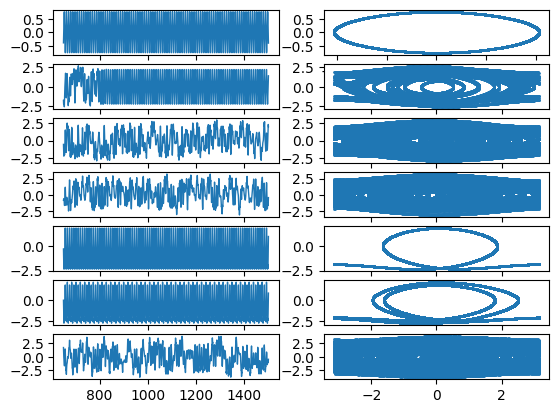

In [5]:
fig, axs = plt.subplots(len(graph), 2)

for i, g in enumerate(graph):
    axs[i, 0].plot(g[0], g[2], linewidth=1)
    axs[i, 1].scatter(g[1], g[2], s=1)

fig.show()


![comp. de ∆t](./Dynamics_of_Particles.png)